In [6]:
import matplotlib.pyplot as plt

def plot_coefficients(title, coefficients):
    ll, (lh, hl, hh) = coefficients
    rows = 2
    columns = 2
    fig = plt.figure(figsize=(7, 7))
    plt.title(title)
    ax = fig.add_subplot(rows, columns, 1)
    ax.set_title('LL')
    plt.imshow(ll)
    ax = fig.add_subplot(rows, columns, 2)
    ax.set_title('LH')
    plt.imshow(lh)
    ax = fig.add_subplot(rows, columns, 3)
    ax.set_title('HL')
    plt.imshow(hl)
    ax = fig.add_subplot(rows, columns, 4)
    ax.set_title('HH')
    plt.imshow(hh)

[[137  80  78  71  13  10  26  10]
 [  0   0   0  13  73  72  68  82]
 [  0   0  13 112   0   0  13 112]
 [  8   6   0   0   0 108 163 216]
 [140   0   0  32   0  73  68  65]
 [ 84 120   1 236 193   9 176 165]
 [249  89  31 230 223 251 157 115]
 [183 238 233 125 246  25 237  11]]
[[137  80  78  71  13  10  26  10]
 [  0   0   0  13  73  72  68  82]
 [  0   0  12 111   0   0  13 112]
 [  8   5   0   0   0 108 163 216]
 [140   0   0  31   0  73  68  65]
 [ 84 120   1 236 193   9 176 165]
 [249  88  31 230 223 251 157 115]
 [183 238 233 125 246  25 237  11]]
2


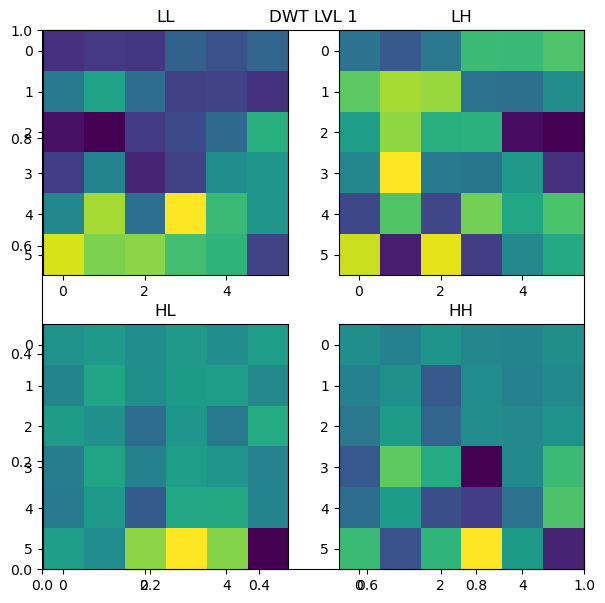

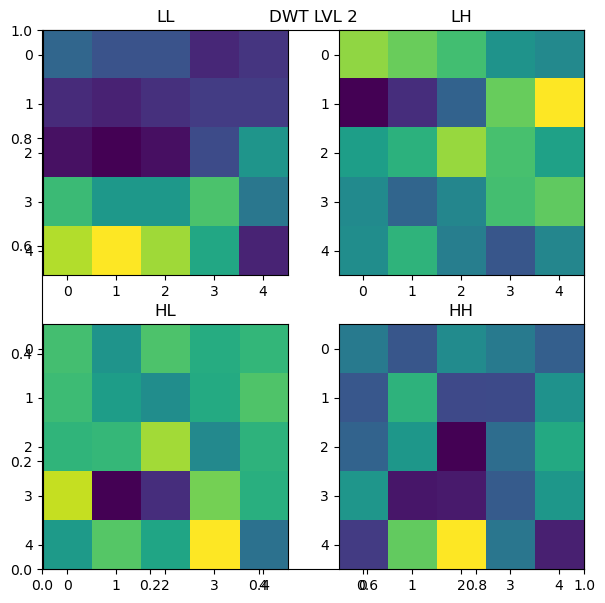

In [7]:
import cv2
import pywt
import numpy as np

image_file = 'landscape.png'
file_path = f'data/images/{image_file}'
rows = 8  
cols = 8  
chunk_size = rows * cols  

with open(file_path, 'rb') as file:
    while True:
        chunk = file.read(chunk_size)
        if not chunk:
            break  # end of file

        remaining_bytes = chunk_size - (len(chunk) % chunk_size)
        if remaining_bytes < chunk_size:
            padding = bytearray([0] * remaining_bytes)
            chunk += padding
        
        chunk_uint8 = np.frombuffer(chunk, dtype=np.uint8)
        chunk_uint8_2d = chunk_uint8.reshape((-1, cols))
        print(chunk_uint8_2d)
        
        dwt_lvl_1_coefficients = pywt.dwt2(chunk_uint8_2d, 'bior2.2')
        plot_coefficients(title='DWT LVL 1',coefficients=dwt_lvl_1_coefficients)
        
        LL, (LH, HL, HH) = dwt_lvl_1_coefficients
        
        dwt_lvl_2_coefficients = pywt.dwt2(LL, 'bior2.2')
        plot_coefficients(title='DWT LVL 2',coefficients=dwt_lvl_2_coefficients)
        
        LL2, (LH2, HL2, HH2) = dwt_lvl_2_coefficients
        
        dwt_lvl_2_coefficients_rec = pywt.idwt2(dwt_lvl_2_coefficients, 'bior2.2')
        dwt_lvl_1_coefficients_rec = pywt.idwt2((dwt_lvl_2_coefficients_rec, (LH, HL, HH)), 'bior2.2')
        
        # dwt_lvl_1_coefficients_recon = pywt.idwt2(dwt_lvl_1_coefficients, 'bior2.2')
        print(np.uint8(dwt_lvl_1_coefficients_rec))
        print(len(dwt_lvl_1_coefficients))
        integers = [int(byte) for byte in chunk]
        # print(integers)
        break
        
